In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
models=[]
acc=[]
precision=[]
recall=[]
f1=[]

## Reading and Manupulating Data


In [58]:
data=pd.read_csv("titanic_train_clean.csv",index_col=0)

In [59]:
data.head()

,Survived,Age,SibSp,Parch,Fare,WOE_Sex,WOE_Embarked,WOE_Cabin,WOE_Pclass
0,0,22.0,1,0,7.2500,-1.457120,-0.676887,-0.847991,-1.139770
1,1,38.0,1,0,71.2833,1.047969,0.215111,11.512925,0.515813
2,1,26.0,0,0,7.9250,1.047969,-0.676887,-0.847991,-1.139770
3,1,35.0,1,0,53.1000,1.047969,-0.676887,0.000000,0.515813
4,0,35.0,0,0,8.0500,-1.457120,-0.676887,-0.847991,-1.139770


In [60]:
data=data.rename(index=str,columns={'WOE_Sex':'Sex','WOE_Embarked':'Embarked','WOE_Cabin':'Cabin','WOE_Pclass':'Pclass'})

In [61]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex,Embarked,Cabin,Pclass
0,0,22.0,1,0,7.2500,-1.457120,-0.676887,-0.847991,-1.139770
1,1,38.0,1,0,71.2833,1.047969,0.215111,11.512925,0.515813
2,1,26.0,0,0,7.9250,1.047969,-0.676887,-0.847991,-1.139770
3,1,35.0,1,0,53.1000,1.047969,-0.676887,0.000000,0.515813
4,0,35.0,0,0,8.0500,-1.457120,-0.676887,-0.847991,-1.139770


#### Spliting the Data

In [62]:
X=data.iloc[:,1:].values
print(X)

[[22.          1.          0.         ... -0.67688666 -0.8479911
  -1.13977036]
 [38.          1.          0.         ...  0.21511138 11.51292546
   0.51581317]
 [26.          0.          0.         ... -0.67688666 -0.8479911
  -1.13977036]
 ...
 [29.69911765  1.          2.         ... -0.67688666 -0.8479911
  -1.13977036]
 [26.          0.          0.         ...  0.21511138 11.51292546
   0.51581317]
 [32.          0.          0.         ... -0.44895022 -0.8479911
  -1.13977036]]


In [63]:
y=data.iloc[:,0].values

#print(y)

In [64]:
from sklearn.model_selection import train_test_split 

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

(array([ 31.,  11.,  13.,  22.,  64.,  71.,  61., 195.,  57.,  31.,  23.,
         27.,  22.,  13.,   9.,   7.,   2.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

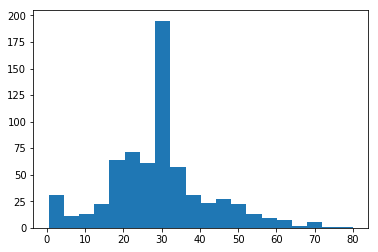

In [66]:
plt.hist(X_train[:,0],bins=20)

(array([421., 133.,  50.,  25.,   7.,  12.,   2.,   0.,   7.,   2.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

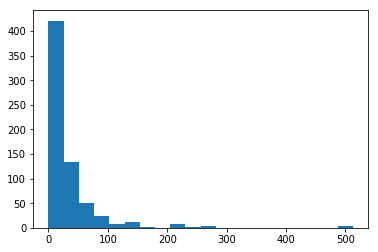

In [67]:
plt.hist(X_train[:,3],bins=20)

#### Scaling the Data

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [69]:
X_train_sc=sc.fit_transform(X_train)

In [70]:
X_test_sc=sc.transform(X_test)

In [71]:
import seaborn as sns

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


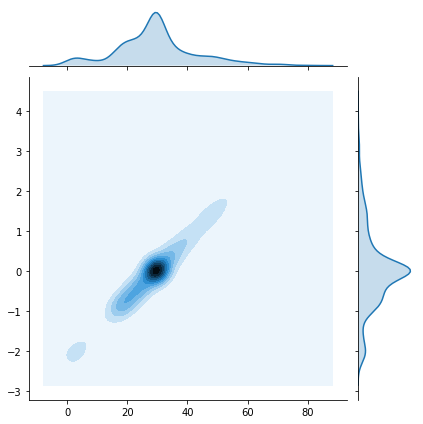

In [72]:
sns.jointplot(X_train[:,0],X_train_sc[:,0],kind='kde')

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


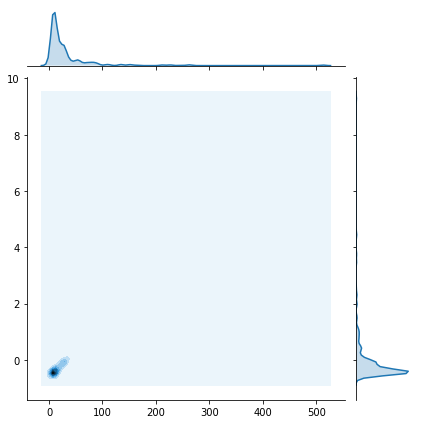

In [73]:
sns.jointplot(X_train[:,3],X_train_sc[:,3],kind='kde')

In [74]:
print(X_train_sc)

[[ 0.11318884 -0.47907352  1.94945952 ... -0.55033139  2.34642839
   1.48801906]
 [ 0.72337988 -0.47907352 -0.45933462 ... -0.55033139 -0.19578217
   0.60322449]
 [ 0.01396549  0.42223429 -0.45933462 ... -0.55033139 -0.19578217
  -0.85718383]
 ...
 [ 3.85060899 -0.47907352 -0.45933462 ... -0.55033139  2.34642839
   1.48801906]
 [ 0.01396549 -0.47907352 -0.45933462 ...  0.10320843 -0.19578217
  -0.85718383]
 [-0.34445445  0.42223429  1.94945952 ...  2.00720717 -0.19578217
   0.60322449]]


## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [76]:
lr.fit(X_train_sc,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
lr.intercept_

array([-0.51045024])

In [78]:
lr.coef_

array([[-0.67553638, -0.47683584, -0.06188581,  0.1365665 ,  1.32928924,
         0.21287265,  2.02650666,  0.64603704]])

In [79]:
y_pred=lr.predict(X_test_sc)

In [80]:
len(y_pred)

223

In [81]:
len(y_test)

223

In [82]:
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,114,18
1,21,70


In [83]:
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)

In [84]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[114  18]
 [ 21  70]]
Accuracy Score :
 0.8251121076233184
Precision Score:
 0.7954545454545454
Recall score: 
 0.7692307692307693
F1 score: 
 0.782122905027933


#### Appending Metrics

In [85]:
models.append("Logistic Regression")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [87]:
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
y_pred=dt.predict(X_test_sc)

In [89]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[111  21]
 [ 21  70]]
Accuracy Score :
 0.8116591928251121
Precision Score:
 0.7692307692307693
Recall score: 
 0.7692307692307693
F1 score: 
 0.7692307692307693


#### Appending Metrics

In [90]:
models.append("Decision Tree")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [91]:
models

['Logistic Regression', 'Decision Tree']

## SVM

In [92]:
from sklearn.svm import SVC

svc=SVC()

In [93]:
svc.fit(X_train_sc,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
y_pred=svc.predict(X_test_sc)

In [95]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[113  19]
 [ 17  74]]
Accuracy Score :
 0.8385650224215246
Precision Score:
 0.7956989247311828
Recall score: 
 0.8131868131868132
F1 score: 
 0.8043478260869565


#### Appending Metrics

In [96]:
models.append("SVM")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [98]:
rf.fit(X_train_sc,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
y_pred=rf.predict(X_test_sc)

In [100]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[120  12]
 [ 21  70]]
Accuracy Score :
 0.852017937219731
Precision Score:
 0.8536585365853658
Recall score: 
 0.7692307692307693
F1 score: 
 0.8092485549132947


###### Appending Metrix

In [101]:
models.append("Random Forest")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [102]:
models

['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest']

## AdaBoost Classifier

In [103]:
from sklearn.ensemble import AdaBoostClassifier

adb=AdaBoostClassifier(base_estimator=dt)

In [104]:
adb.fit(X_train_sc,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [105]:
y_pred=adb.predict(X_test_sc)

In [106]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[113  19]
 [ 23  68]]
Accuracy Score :
 0.8116591928251121
Precision Score:
 0.7816091954022989
Recall score: 
 0.7472527472527473
F1 score: 
 0.7640449438202248


In [107]:
models.append("Adb Boost")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [108]:
models

['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Adb Boost']

## Average Ensemble

In [110]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('Logistic Regression',lr),
                                   ('SVM',svc),
                                   ('Decision Tree',dt),
                                   ('Random Forest',rf),
                                   ('AdaBoost',adb)], 
                       voting='hard')

In [111]:
vc.fit(X_train_sc,y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)...ne,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [112]:
y_pred=vc.predict(X_test_sc)

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [113]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[116  16]
 [ 19  72]]
Accuracy Score :
 0.8430493273542601
Precision Score:
 0.8181818181818182
Recall score: 
 0.7912087912087912
F1 score: 
 0.8044692737430168


In [114]:
models.append("Average Ensemble")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

## Hyper Parameter tunning

In [118]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, 
                             X = X_train_sc, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
acStd = accuracies.std()

In [119]:
print(acMean)
print(acStd)

0.8634053508680374
0.041326666516242984


In [120]:
accuracies

array([0.79104478, 0.88059701, 0.94029851, 0.89552239, 0.8358209 ,
       0.88059701, 0.82089552, 0.83333333, 0.86363636, 0.89230769])

#### Tunning Random Forest

In [139]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [5, 7, 12],
              "criterion":['gini','entropy'],
              "max_depth": [3, 4, 5],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy', #f1_scorer
                           cv = 10,
                           n_jobs = -1) #use all processor
grid_search = grid_search.fit(X_train_sc, y_train)

In [140]:
best_accuracy = grid_search.best_score_
best_accuracy

0.8858858858858859

In [141]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.005,
 'n_estimators': 12}

In [142]:
tunedRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.005, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
y_pred=tunedRF.predict(X_test_sc)

In [144]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[116  16]
 [ 19  72]]
Accuracy Score :
 0.8430493273542601
Precision Score:
 0.8181818181818182
Recall score: 
 0.7912087912087912
F1 score: 
 0.8044692737430168


In [145]:
#Recall improved as TP changed 70 to 72

models.append("Random Forest tune")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

#### Tunning Decision tree

In [150]:
parameters = {"criterion":['gini','entropy'],
              "max_depth": [3, 4, 5],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy', #f1_scorer
                           cv = 10,
                           n_jobs = -1) #use all processor
grid_search_dt = grid_search.fit(X_train_sc, y_train)

In [162]:
best_parameters=grid_search_dt.best_params_

best_parameters

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.005}

In [152]:
grid_search_dt.best_score_

0.8693693693693694

In [155]:
tunedDT = DecisionTreeClassifier(criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedDT.fit(X_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.005, presort=False,
            random_state=None, splitter='best')

In [156]:
y_pred=tunedDT.predict(X_test_sc)

In [157]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[122  10]
 [ 25  66]]
Accuracy Score :
 0.8430493273542601
Precision Score:
 0.868421052631579
Recall score: 
 0.7252747252747253
F1 score: 
 0.7904191616766467


In [158]:
 #[[111  21]
# [ 21  70]]

#Recall improved
models.append("Decisiontree tune")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))


#### Creating ADB2 on tuned DT

In [163]:
adb2=AdaBoostClassifier(base_estimator=tunedDT)

In [164]:
adb2.fit(X_train_sc,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.005, presort=False,
            random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [165]:
y_pred=adb2.predict(X_test_sc)

In [166]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[114  18]
 [ 21  70]]
Accuracy Score :
 0.8251121076233184
Precision Score:
 0.7954545454545454
Recall score: 
 0.7692307692307693
F1 score: 
 0.782122905027933


In [167]:
models.append("Adb2")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

#### Tunning Ada Boost base model

In [174]:
parameters = {"n_estimators": [5, 7, 12],
              "algorithm" : ["SAMME", "SAMME.R"]}
grid_search = GridSearchCV(estimator = adb,
                           param_grid = parameters,
                           scoring = 'accuracy', #f1_scorer
                           cv = 10,
                           n_jobs = -1) #use all processor
grid_search_adb = grid_search.fit(X_train_sc, y_train)

In [175]:
grid_search_adb.best_score_

0.8648648648648649

In [176]:
best_parameters=grid_search_adb.best_params_

best_parameters

{'algorithm': 'SAMME', 'n_estimators': 5}

In [177]:
tunedADB = AdaBoostClassifier(n_estimators = best_parameters["n_estimators"],
                                 algorithm = best_parameters["algorithm"],
                                )
tunedADB.fit(X_train_sc, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=5, random_state=None)

In [178]:
y_pred=tunedADB.predict(X_test_sc)

In [179]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[110  22]
 [ 18  73]]
Accuracy Score :
 0.820627802690583
Precision Score:
 0.7684210526315789
Recall score: 
 0.8021978021978022
F1 score: 
 0.7849462365591398


In [180]:
models.append("Ada Boost tuned")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

In [185]:
parameters = {"n_estimators": [5, 7, 12],
              "algorithm" : ["SAMME", "SAMME.R"]}
grid_search = GridSearchCV(estimator = adb2,
                           param_grid = parameters,
                           scoring = 'accuracy', #f1_scorer
                           cv = 10,
                           n_jobs = -1) #use all processor
grid_search_adb2 = grid_search.fit(X_train_sc, y_train)

In [186]:
grid_search_adb2.best_score_

0.8723723723723724

In [187]:
best_parameters=grid_search_adb2.best_params_
best_parameters

{'algorithm': 'SAMME', 'n_estimators': 5}

In [188]:
tunedADB2 = AdaBoostClassifier(n_estimators = best_parameters["n_estimators"],
                                 algorithm = best_parameters["algorithm"],
                                )
tunedADB2.fit(X_train_sc, y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=5, random_state=None)

In [189]:
y_pred=tunedADB2.predict(X_test_sc)

In [190]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[110  22]
 [ 18  73]]
Accuracy Score :
 0.820627802690583
Precision Score:
 0.7684210526315789
Recall score: 
 0.8021978021978022
F1 score: 
 0.7849462365591398


In [191]:
models.append("Adb2 tuned")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

##### Tune SVM

In [196]:
parameters = {"kernel": ["linear", "poly", "rbf", "sigmoid"] ,
              "decision_function_shape":['ovo','ovr']
              }
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy', #f1_scorer
                           cv = 10,
                           n_jobs = -1) #use all processor
grid_search_svc = grid_search.fit(X_train_sc, y_train)

In [197]:
grid_search_svc.best_score_

0.8768768768768769

In [203]:
best_parameters=grid_search_svc.best_params_

In [204]:
tunedSVM = SVC(kernel=best_parameters["kernel"],
               decision_function_shape = best_parameters["decision_function_shape"]
                                )
tunedSVM.fit(X_train_sc, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [205]:
y_pred=tunedSVM.predict(X_test_sc)

In [206]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[113  19]
 [ 17  74]]
Accuracy Score :
 0.8385650224215246
Precision Score:
 0.7956989247311828
Recall score: 
 0.8131868131868132
F1 score: 
 0.8043478260869565


In [207]:
models.append("SVM tuned")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

#### Creating Average Assemble on Tunned model

In [211]:
tunedVC = VotingClassifier(estimators=[ ('SVM',tunedSVM),
                                   ('Decision Tree',tunedDT),
                                   ('Random Forest',tunedRF),
                                   ('AdaBoost',tunedADB2)], 
                       voting='hard')

In [212]:
tunedVC.fit(X_train_sc,y_train)

VotingClassifier(estimators=[('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('Decision Tree', DecisionTreeClassifier(class_weight...ithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=5, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [213]:
y_pred=tunedVC.predict(X_test_sc)

C:\Users\sachin.gupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [214]:
print("confusion Metrix :\n",confusion_matrix(y_test,y_pred))
print("Accuracy Score :\n",accuracy_score(y_test,y_pred))
print("Precision Score:\n",precision_score(y_test,y_pred))
print("Recall score: \n",recall_score(y_test,y_pred))
print("F1 score: \n",f1_score(y_test,y_pred))

confusion Metrix :
 [[121  11]
 [ 26  65]]
Accuracy Score :
 0.8340807174887892
Precision Score:
 0.8552631578947368
Recall score: 
 0.7142857142857143
F1 score: 
 0.778443113772455


In [215]:
models.append("Average Ensemble  tuned")
acc.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
f1.append(f1_score(y_test,y_pred))

# Best Model Ranking

In [219]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1}

In [1]:
model_df=pd.DataFrame(model_dict)
model_df

NameError: name 'pd' is not defined

In [221]:
model_df.sort_values(['Accuracies','f1-score','Recall','Precision'],ascending=False)

,Models,Accuracies,Precision,Recall,f1-score
3,Random Forest,0.852018,0.853659,0.769231,0.809249
5,Average Ensemble,0.843049,0.818182,0.791209,0.804469
6,Random Forest tune,0.843049,0.818182,0.791209,0.804469
7,Decisiontree tune,0.843049,0.868421,0.725275,0.790419
2,SVM,0.838565,0.795699,0.813187,0.804348
11,SVM tuned,0.838565,0.795699,0.813187,0.804348
12,Average Ensemble tuned,0.834081,0.855263,0.714286,0.778443
0,Logistic Regression,0.825112,0.795455,0.769231,0.782123
8,Adb2,0.825112,0.795455,0.769231,0.782123
9,Ada Boost tuned,0.820628,0.768421,0.802198,0.784946
